In [521]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, ttest_ind, ttest_1samp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Problem 1 : Wholesale Customers Analysis

In [69]:
ws_df = pd.read_csv("Wholesale+Customers+Data.csv")

## Dataframe Sample

In [35]:
ws_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### Datatype Analysis

In [3]:
ws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


### Missing Data Analysis

In [41]:
ws_df.isnull().any()

Buyer/Spender       False
Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool

## Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

## Descriptive Statistic

In [135]:
ws_df.describe(include = "all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Amount_Spent
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000


In [141]:
ws_df['Total_Amount_Spent'] = ws_df.Fresh + ws_df.Milk + ws_df.Grocery + ws_df.Frozen + ws_df.Detergents_Paper + ws_df.Delicatessen

# For Region Analysis

ws_df1 = ws_df[['Region', 'Total_Amount_Spent']].groupby('Region', as_index=False).sum().sort_values('Total_Amount_Spent')

# For Channel Analysis

ws_df2 = ws_df[['Channel', 'Total_Amount_Spent']].groupby('Channel', as_index=False).sum().sort_values('Total_Amount_Spent')

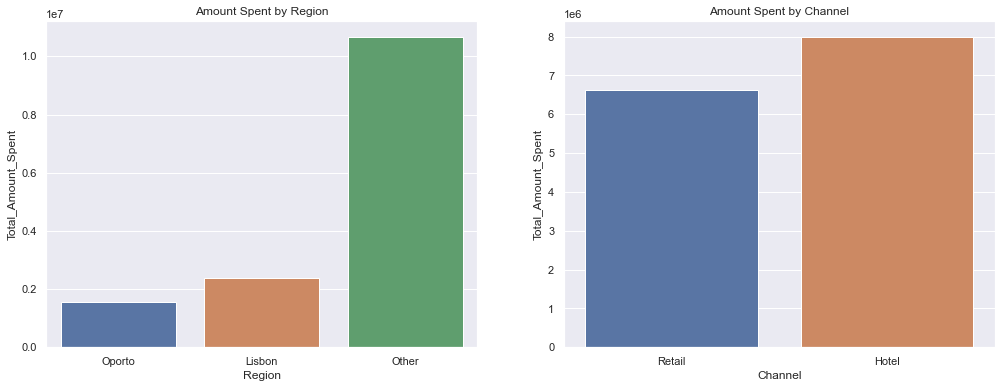

In [133]:
# Graphical analysis

# Set figure size
sns.set( rc = {'figure.figsize' : ( 17, 6), 
               'axes.labelsize' : 12 })

plt.subplot(1, 2, 1)
a = sns.barplot(x= ws_df1['Region'], y = ws_df1['Total_Amount_Spent'], data = ws_df1).set(title='Amount Spent by Region');

plt.subplot(1, 2, 2)
b = sns.barplot(x= ws_df2['Channel'], y = ws_df2['Total_Amount_Spent'], data = ws_df2).set(title='Amount Spent by Channel');

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [239]:
ws_df2 = ws_df.drop(['Buyer/Spender','Total_Amount_Spent'], axis = 1)
ws_df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


The coeficient of variation is standard deviation divided by the mean.
cov = std/mean

In [240]:
ws_df2.describe()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
1,mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
2,std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
3,min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
4,25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
5,50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
6,75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
7,max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [261]:
ws_df_channel = ws_df2.groupby(by = 'Channel').std()/ws_df2.groupby(by = 'Channel').mean()
ws_df_channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,1.026428,1.260867,0.894849,1.505745,1.396596,2.222828
Retail,1.009365,0.903246,0.751543,1.096932,0.865408,1.114267


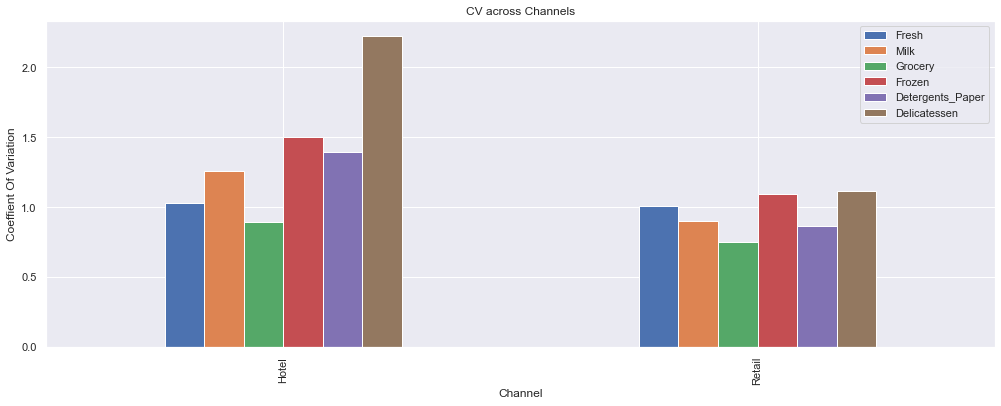

In [271]:
ws_df_channel.plot(kind = 'bar');

# depicting the visualization
plt.xlabel('Channel') 
plt.ylabel('Coeffient Of Variation') 
  
# displaying the title
plt.title("CV across Channels")
  
plt.show() 

In [263]:
ws_df_region = ws_df2.groupby(by = 'Region').std()/ws_df2.groupby(by = 'Region').mean()
ws_df_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,1.041049,1.039815,1.147670,1.030599,1.587430,0.993008
Oporto,0.848318,1.145076,1.176182,2.262291,1.766718,0.906043
Other,1.068277,1.327648,1.207808,1.446761,1.630040,1.994680


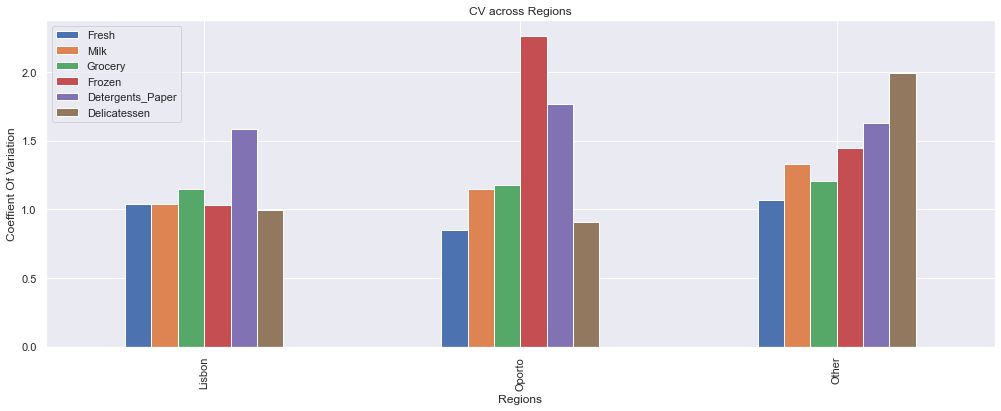

In [268]:
ws_df_region.plot(kind = 'bar');

# depicting the visualization
plt.xlabel('Regions') 
plt.ylabel('Coeffient Of Variation') 
  
# displaying the title
plt.title("CV across Regions")
  
plt.show() 

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [277]:
ws_behaviour = ws_df2.describe().reset_index()
ws_behaviour

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
1,mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
2,std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
3,min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
4,25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
5,50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
6,75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
7,max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [278]:
#define function to calculate cv
cv = lambda x: np.std(x) / np.mean(x)

#calculate CV for each column in data frame
cv = list(ws_df2.select_dtypes(include='number').apply(cv))
cv.insert(0, 'cv')

ws_behaviour.loc[len(ws_behaviour.index)]=cv
ws_behaviour = ws_behaviour.transpose()
ws_behaviour.rename(columns=ws_behaviour.iloc[0], inplace = True)
ws_behaviour = ws_behaviour.iloc[1:,:]
ws_behaviour

,count,mean,std,min,25%,50%,75%,max,cv
Fresh,440,12000.3,12647.3,3,3127.75,8504,16933.8,112151,1.05272
Milk,440,5796.27,7380.38,55,1533,3627,7190.25,73498,1.27185
Grocery,440,7951.28,9503.16,3,2153,4755.5,10655.8,92780,1.19382
Frozen,440,3071.93,4854.67,25,742.25,1526,3554.25,60869,1.57854
Detergents_Paper,440,2881.49,4767.85,3,256.75,816.5,3922,40827,1.65277
Delicatessen,440,1524.87,2820.11,3,408.25,965.5,1820.25,47943,1.8473


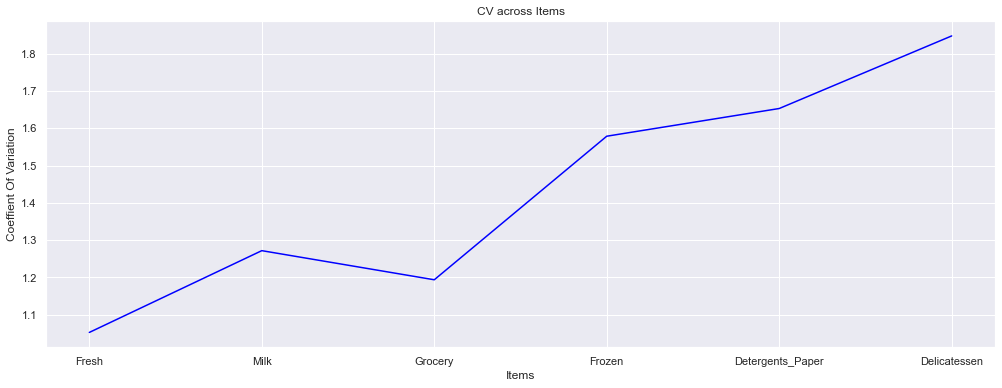

In [282]:
ws_behaviour['cv'].plot(color = 'blue');

# depicting the visualization
plt.xlabel('Items') 
plt.ylabel('Coeffient Of Variation') 
  
# displaying the title
plt.title("CV across Items")
  
plt.show() 

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

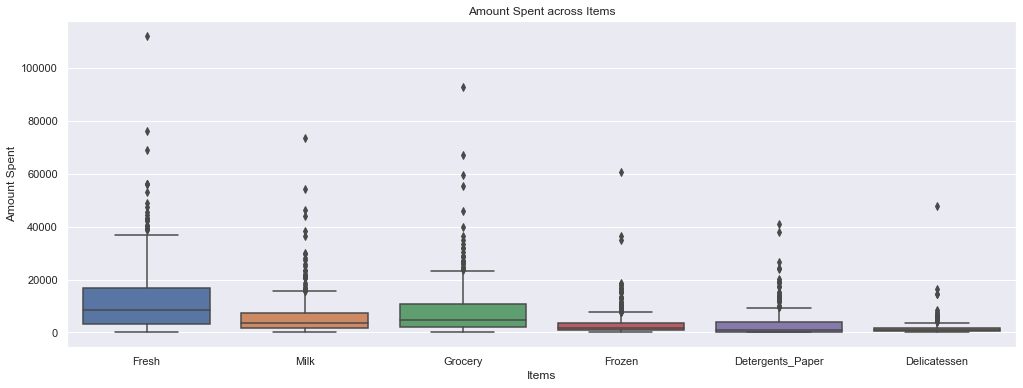

In [302]:
sns.boxplot(data = ws_df2);

# depicting the visualization
plt.xlabel('Items') 
plt.ylabel('Amount Spent') 
  
# displaying the title
plt.title("Amount Spent across Items")
  
plt.show() 


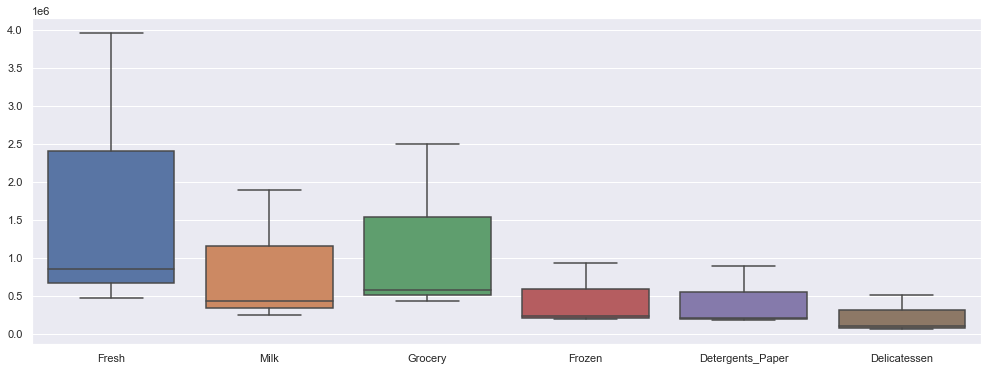

In [297]:
sns.boxplot(data = ws_df2.groupby(by = ['Region']).sum());

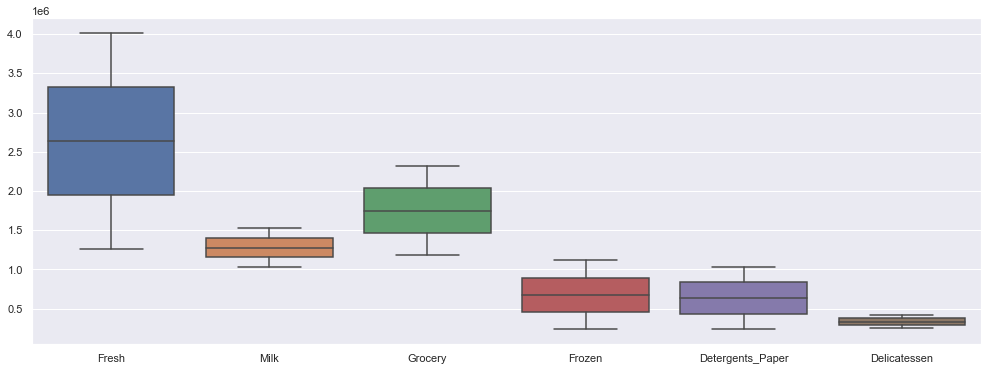

In [299]:
sns.boxplot(data = ws_df2.groupby(by = ['Channel']).sum());

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Finding correlations among the variables

In [321]:
ws_df3 = ws_df.drop('Total_Amount_Spent', axis = 1)


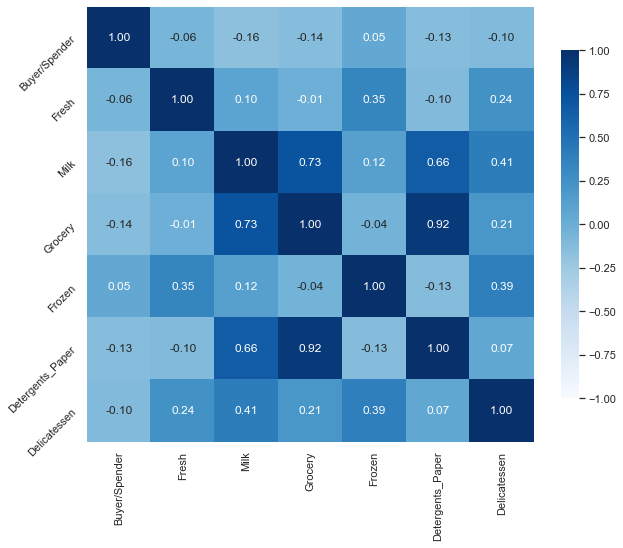

In [322]:
fig, ax = plt.subplots(figsize=(10, 8))

# get correlations
df_corr = ws_df3.corr()


# plot heatmap
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=45)
plt.show()


In [328]:
ws_df_region = ws_df2.groupby(by = 'Region').mean()
ws_df_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


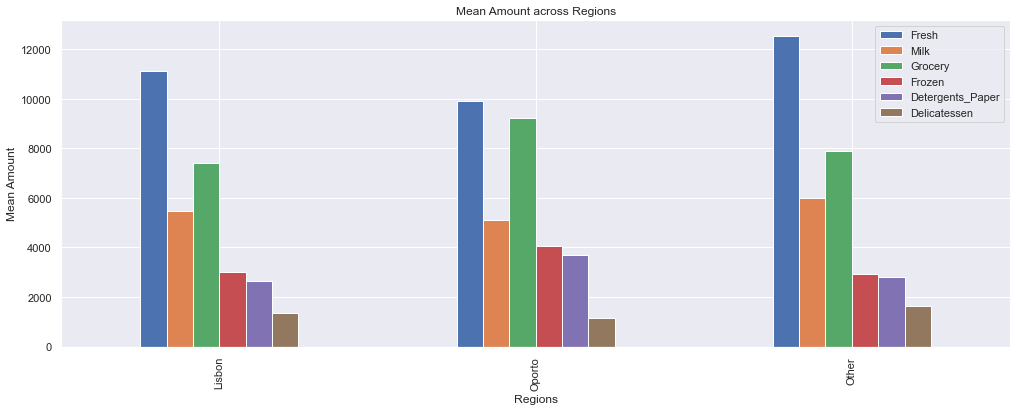

In [333]:
ws_df_region.plot(kind = 'bar');

# depicting the visualization
plt.xlabel('Regions') 
plt.ylabel('Mean Amount') 
  
# displaying the title
plt.title("Mean Amount across Regions")
  
plt.show() 

# Problem 2 : Students Survey Analysis

In [334]:
ss_df = pd.read_csv("Survey-1.csv")

## Dataframe Sample

In [341]:
ss_df.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## Dataset Description

In [338]:
ss_df.describe(include = 'all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


## Datatypes of dataset

In [342]:
ss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## Missing Data Analysis

In [344]:
ss_df.isnull().any()

ID                   False
Gender               False
Age                  False
Class                False
Major                False
Grad Intention       False
GPA                  False
Employment           False
Salary               False
Social Networking    False
Satisfaction         False
Spending             False
Computer             False
Text Messages        False
dtype: bool

## Problems

### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
#### 2.1.1. Gender and Major

In [345]:
pd.crosstab(ss_df.Gender, ss_df.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.1.2. Gender and Grad Intention

In [349]:
pd.crosstab(ss_df['Gender'], ss_df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 2.1.3. Gender and Employment

In [350]:
pd.crosstab(ss_df['Gender'], ss_df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 2.1.4. Gender and Computer

In [351]:
pd.crosstab(ss_df['Gender'], ss_df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [356]:
p_male = len(ss_df[ss_df['Gender'] == 'Male'])/len(ss_df['ID'])
print(f"The probability that a randomly selected CMSU student will be male is {p_male}")

The probability that a randomly selected CMSU student will be male is 0.46774193548387094


#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [472]:
p_female = len(ss_df[ss_df['Gender'] == 'Female'])/len(ss_df['ID'])
print(f"The probability that a randomly selected CMSU student will be female is {p_female}")

The probability that a randomly selected CMSU student will be female is 0.532258064516129


In [363]:
dict = {'Male_Prob':p_male,'Female_Prob':p_female}
p_df=pd.DataFrame(dict, index = [0]) 
p_df

,Male_Prob,Female_Prob
0,0.467742,0.532258


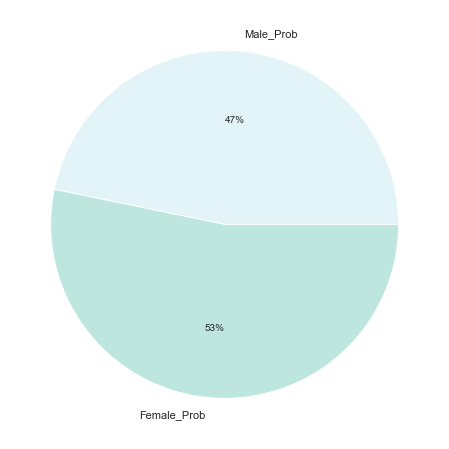

In [482]:
plt.figure(figsize=(16,8))
#define Seaborn color palette to use
colors = sns.color_palette('BuGn')[0:5]

#create pie chart
plt.pie(p_df, colors = colors, autopct='%.0f%%', labels = ['Male_Prob','Female_Prob'])
plt.show()

### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [479]:
pd.crosstab(ss_df.Gender, ss_df.Major,margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


P (Major | Male) = P (Major ∩ Male)/ P(Male)

P (Major | Female) = P (Major ∩ Female)/ P(Female)

In [494]:
ss_df.groupby('Gender')['Major'].value_counts() /ss_df.groupby('Gender')['Major'].count() 

Gender  Major                 
Female  Retailing/Marketing       0.272727
        Economics/Finance         0.212121
        International Business    0.121212
        Management                0.121212
        Accounting                0.090909
        CIS                       0.090909
        Other                     0.090909
Male    Management                0.206897
        Retailing/Marketing       0.172414
        Accounting                0.137931
        Economics/Finance         0.137931
        Other                     0.137931
        Undecided                 0.103448
        International Business    0.068966
        CIS                       0.034483
Name: Major, dtype: float64

In [495]:
cond_prob_df = pd.read_csv("Major_Gender.csv")
cond_prob_df[cond_prob_df['Gender  '] == 'Male    ']

,Gender,Major,Probability
7,Male,Management,0.206897
8,Male,Retailing/Marketing,0.172414
9,Male,Accounting,0.137931
10,Male,Economics/Finance,0.137931
11,Male,Other,0.137931
12,Male,Undecided,0.103448
13,Male,International Business,0.068966
14,Male,CIS,0.034483


In [483]:
print('Among MALE candidates:')
print('Probability of Management Major:',6/29)
print('Probability of Retailing/Marketing Major:',5/29)
print('Probability of Accounting Major:',4/29)
print('Probability of Economics/Finance Major:',4/29)
print('Probability of Other Major:',4/29)
print('Probability of Undecided Major:',3/29)
print('Probability of International Business Major:',2/29)
print('Probability of CIS Major:',1/29)

Among MALE candidates:
Probability of Management Major: 0.20689655172413793
Probability of Retailing/Marketing Major: 0.1724137931034483
Probability of Accounting Major: 0.13793103448275862
Probability of Economics/Finance Major: 0.13793103448275862
Probability of Other Major: 0.13793103448275862
Probability of Undecided Major: 0.10344827586206896
Probability of International Business Major: 0.06896551724137931
Probability of CIS Major: 0.034482758620689655


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [496]:
cond_prob_df[cond_prob_df['Gender  '] == 'Female  ']

,Gender,Major,Probability
0,Female,Retailing/Marketing,0.272727
1,Female,Economics/Finance,0.212121
2,Female,International Business,0.121212
3,Female,Management,0.121212
4,Female,Accounting,0.090909
5,Female,CIS,0.090909
6,Female,Other,0.090909


In [497]:
print('Among FEMALE candidates:')
print('Probability of Retailing/Marketing Major:',9/33)
print('Probability of Economics/Finance Major:',7/33)
print('Probability of International Business Major:',4/33)
print('Probability of Management Major:',4/33)
print('Probability of Accounting Major:',3/33)
print('Probability of CIS Major:',3/33)
print('Probability of Other Major:',3/33)
print('Probability of Undecided Major:',0/33)
print()

Among FEMALE candidates:
Probability of Retailing/Marketing Major: 0.2727272727272727
Probability of Economics/Finance Major: 0.21212121212121213
Probability of International Business Major: 0.12121212121212122
Probability of Management Major: 0.12121212121212122
Probability of Accounting Major: 0.09090909090909091
Probability of CIS Major: 0.09090909090909091
Probability of Other Major: 0.09090909090909091
Probability of Undecided Major: 0.0



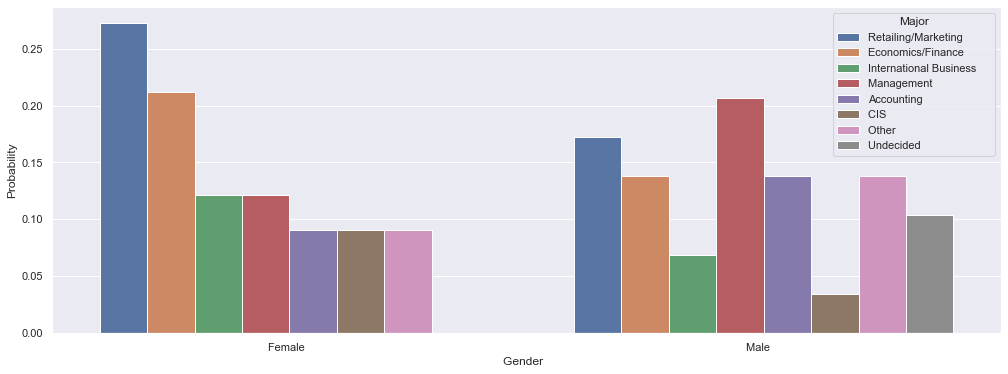

In [408]:
sns.barplot(data = cond_prob_df, x = cond_prob_df['Gender  '],hue = cond_prob_df['Major'], y= cond_prob_df['Probability']);

In [407]:
cond_prob_df.columns

Index(['Gender  ', 'Major', 'Probability'], dtype='object')

### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [413]:
pd.crosstab(ss_df['Gender'], ss_df['Grad Intention'], margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [423]:
p_m_g = (29/62)*(28/62)
print(f"Probability that a randomly chosen student is a male and intends to graduate is {p_m_g}")

Probability that a randomly chosen student is a male and intends to graduate is 0.21123829344432882


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [424]:
pd.crosstab(ss_df['Gender'], ss_df['Computer'], marxgins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [435]:
p_f_nl = (33/62)*(7/62)
print(f"Probability that a randomly selected student is a female and does NOT have a laptop is {p_f_nl}")

Probability that a randomly selected student is a female and does NOT have a laptop is 0.060093652445369405


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [427]:
ss_df.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50


In [429]:
pd.crosstab(ss_df['Gender'], ss_df['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [436]:
p_m_ft = (29/62)+(10/62)
print(f"Probability that a randomly chosen student is a male or has full-time employment is {p_m_ft}")

Probability that a randomly chosen student is a male or has full-time employment is 0.6290322580645161


#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [432]:
ss_df.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50


In [433]:
pd.crosstab(ss_df['Gender'], ss_df['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [437]:
p_f_m = (4/33)+(4/33)
print(f"Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is {p_f_m}")

Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.24242424242424243


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [439]:
pd.crosstab(ss_df['Gender'], ss_df[ss_df['Grad Intention']!= 'Undecided']['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


Events A and B are independent if the equation P(A∩B) = P(A) · P(B) holds true

In [440]:
pd.crosstab(ss_df['Gender'], ss_df[ss_df['Grad Intention']!= 'Undecided']['Grad Intention'], margins = True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [441]:
#  P(A∩B)
p_f_g = 11/40
p_f = 20/40
p_g = 28/40

if p_f_g == p_f * p_g:
    print('The graduate intention and being female are independent events')
else:
    print('The graduate intention and being female are not independent events')

The graduate intention and being female are not independent events


In [442]:
#  P(A∩B)
p_f_g = 11/40
p_f = 20/40
p_n_g = 12/40

if p_f_g == p_f * p_n_g:
    print('The graduate intention and being female are independent events')
else:
    print('The graduate intention and being female are not independent events')

The graduate intention and being female are not independent events


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data
#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [498]:
an(),ss_df.GPA.std()) * 100}%")

If a student is chosen randomly,the probability that his/her GPA is less than 3 is 36.62099174094998%


In [603]:
students_GPA_less_than_3 = ss_df[ss_df['GPA'] < 3]['ID'].count()
students_Total = ss_df['ID'].count()
print(f"If a student is chosen randomly,the probability that his/her GPA is less than 3 is {students_GPA_less_than_3/students_Total}")

If a student is chosen randomly,the probability that his/her GPA is less than 3 is 0.27419354838709675


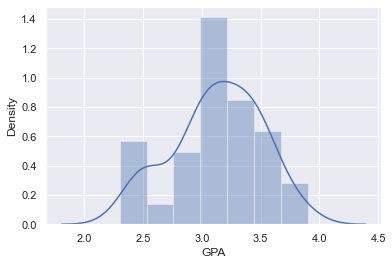

In [464]:
sns.distplot(ss_df.GPA)
plt.show()

#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [604]:
pd.crosstab(ss_df['Gender'], ss_df['Salary'], margins = True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [605]:
print(f"Probability that a randomly selected male earns 50 or more is {14/29}")
print(f"Probability that a randomly selected female earns 50 or more is {18/33}")

Probability that a randomly selected male earns 50 or more is 0.4827586206896552
Probability that a randomly selected female earns 50 or more is 0.5454545454545454


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

#### GPA

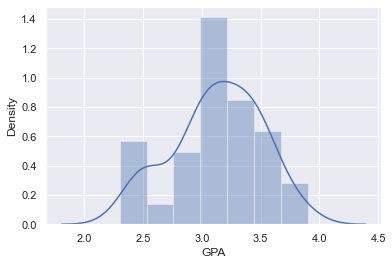

GPA Mean : 3.129032258064516
GPA Standard Deviation : 0.3773883926969118


In [588]:
sns.distplot(ss_df.GPA)
plt.show()
print(f'GPA Mean : {ss_df.GPA.mean()}')
print(f'GPA Standard Deviation : {ss_df.GPA.std()}')

In [616]:
# setting the values of
# mean and S.D.
mean = ss_df.GPA.mean()
SD = ss_df.GPA.std()
 
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
 
# printing the value of fractions
# within each band
print("Fraction of values within one SD for GPA =", one_sd * 100)
print("Fraction of values within two SD for GPA =", two_sd * 100)
print("Fraction of values within three SD for GPA =", three_sd * 100)

Fraction of values within one SD for GPA = 1.535136899223123e-11
Fraction of values within two SD for GPA = 1.574309499450188e-08
Fraction of values within three SD for GPA = 6.073212543471891e-06


#### Salary

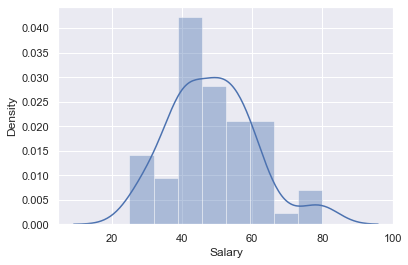

Salary Mean : 48.54838709677419
Salary Standard Deviation : 12.080912216337277


In [589]:
sns.distplot(ss_df.Salary)
plt.show()
print(f'Salary Mean : {ss_df.Salary.mean()}')
print(f'Salary Standard Deviation : {ss_df.Salary.std()}')

In [617]:
# setting the values of
# mean and S.D.
mean = ss_df.Salary.mean()
SD = ss_df.Salary.std()
 
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
 
# printing the value of fractions
# within each band
print("Fraction of values within one SD for Salary =", one_sd* 100)
print("Fraction of values within two SD for Salary =", two_sd * 100)
print("Fraction of values within three SD for Salary =", three_sd * 100)

Fraction of values within one SD for Salary = 0.1269456103722002
Fraction of values within two SD for Salary = 2.1764261429870446
Fraction of values within three SD for Salary = 15.419579828311436


#### Spending

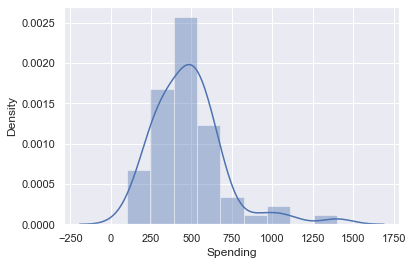

Spending Mean : 482.01612903225805
Spending Standard Deviation : 221.95380496596204


In [590]:
sns.distplot(ss_df.Spending)
plt.show()
print(f'Spending Mean : {ss_df.Spending.mean()}')
print(f'Spending Standard Deviation : {ss_df.Spending.std()}')

In [618]:
# setting the values of
# mean and S.D.
mean = ss_df.Spending.mean()
SD = ss_df.Spending.std()
 
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
 
# printing the value of fractions
# within each band
print("Fraction of values within one SD for Spending =", one_sd * 100)
print("Fraction of values within two SD for Spending =", two_sd * 100)
print("Fraction of values within three SD for Spending =", three_sd * 100)

Fraction of values within one SD for Spending = 11.990186179634362
Fraction of values within two SD for Spending = 43.18232570080062
Fraction of values within three SD for Spending = 79.62507832658152


#### Text Messages

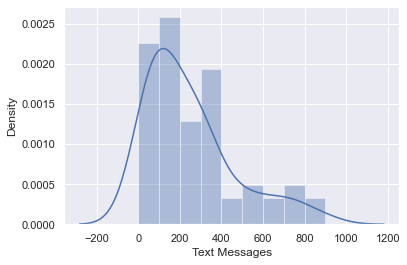

Text Messages Mean : 246.20967741935485
Text Messages Standard Deviation : 214.4659503026961


In [595]:
sns.distplot(ss_df['Text Messages'])
plt.show()
mean =  ss_df["Text Messages"].mean()
std = ss_df["Text Messages"].std()
print(f'Text Messages Mean : {mean}')
print(f'Text Messages Standard Deviation : {std}')

In [619]:
# setting the values of
# mean and S.D.
mean = ss_df['Text Messages'].mean()
SD = ss_df['Text Messages'].std()
 
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
 
# printing the value of fractions
# within each band
print("Fraction of values within one SD for Text Messages =", one_sd * 100)
print("Fraction of values within two SD for Text Messages =", two_sd * 100)
print("Fraction of values within three SD for Text Messages =", three_sd * 100)

Fraction of values within one SD for Text Messages = 42.53099287111714
Fraction of values within two SD for Text Messages = 80.20674520303264
Fraction of values within three SD for Text Messages = 96.79693937041166


# Problem 3 : AB shingles Moisture Analysis

## Dataframe Sample

In [512]:
ab_df = pd.read_csv("A+&+B+shingles.csv")

## Dataset Description

In [513]:
ab_df.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


## Datatypes of dataset

In [514]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


## Missing Data Analysis

In [515]:
ab_df.isnull().any()

A    False
B     True
dtype: bool

## Problems

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

# Step 1: State the Null and Alternative Hypothesis.
1. Alternative hypothesis (HA) : mean moisture content > 0.35
2. Null hypothesis (H0) : mean moisture content = 0.35


To perform Hypothesis Testing, the following assumptions must hold,

1. The variables must follow continious distribution
2. The sample must be randomly collected from the population
3. The underlying distribution must be normal. Alternatively, if the data is continious, but may not be assumed to follow a normal distribution, a reasonlably large sample size is required. CLT asserts that sample mean follows a normal distribution, even if the population distribution is not normal, when sample size is atleast 30.

#### Step 2: Decide the significance level
1. Here we select Alpha = 0.05
2. The sample size for A Shingles is 36
3. The sample size for B Shingles is 31

#### Step 3: Identify the test Statistic
We are not aware of the Population standard deviation, hence we use ttest for 1 Sample here, for A and B seperately.

#### Step 4: Calculate the p_value
Here we will use ttest_1samp to find the p - value. This function returns t statistics and 2-tailed P- value.


#### Analysis for A Shingles

In [555]:
# Assumptions

alpha = 0.05

# Expected value
mu = 0.35

# ttest_1samp 
t_stats, p_value_a = ttest_1samp(ab_df['A'], 0.35,nan_policy = 'omit')
p_value_a = p_value_a/2
p_value_a

0.07477633144907513

In [560]:
if p_value_a < alpha:
    print(f'Since p - value is {p_value_a}, which is less than the significance of a test(i.e. 0.05), Hence we have enough evidence to reject the Null Hypothesis that mean moisture content of A Shingles <= 0.35')
else:
    print(f'Since p - value is {p_value_a}, which is more than the significance of a test(i.e. 0.05), Hence we do not have enough evidence to reject the Null Hypothesis that the mean moisture content of A Shingles <= 0.35')



Since p - value is 0.07477633144907513, which is more than the significance of a test(i.e. 0.05), Hence we do not have enough evidence to reject the Null Hypothesis that the mean moisture content of A Shingles <= 0.35


#### Analysis for B Shingles

In [557]:
# Assumptions

alpha = 0.05

# Expected value
mu = 0.35

# ttest_1samp 
t_stats, p_value_b = ttest_1samp(ab_df['B'], 0.35,nan_policy = 'omit')
p_value_b = p_value_b/2
p_value_b

0.0020904774003191826

In [561]:
if p_value_b < alpha:
    print(f'Since p - value is {p_value_b}, which is less then the significance of a test(i.e. 0.05), Hence we have enough evidence to reject the Null Hypothesis that mean moisture content of B Shingles <= 0.35')
else:
    print(f'Since p - value is {p_value_b}, which is more then the significance of a test(i.e. 0.05), Hence we do not have enough evidence to reject the Null Hypothesis that the mean moisture content of B Shingles <= 0.35')




Since p - value is 0.0020904774003191826, which is less then the significance of a test(i.e. 0.05), Hence we have enough evidence to reject the Null Hypothesis that mean moisture content of B Shingles <= 0.35


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Step 1: State the Null and Alternative Hypothesis
1. Alternative hypothesis (HA) : The mean population of A & B are not equal.
2. Null hypothesis (H0) : The mean population of A & B are equal.

To perform Hypothesis Testing, the following assumptions must hold,
1. The variables must follow continuous distribution
2. The sample must be randomly collected from the population
3. The underlying distribution must be normal. Alternatively, if the data is continuous, but may not be assumed to follow a normal distribution, a reasonably large sample size is required. CLT asserts that sample mean follows a normal distribution, even if the population distribution is not normal, when sample size is at-least 30.

#### Step 2: Decide the significance level
1. Here we select Alpha = 0.05.
2. The sample size for A Shingles is 36
3. The sample size for B Shingles is 31

#### Step 3: Identify the test Statistic
We are dealing with 2 independent samples, hence we use ttest for 2 Sample here, for both A & B.

#### Step 4: Calculate the P-value for A  and B Shingles

In [562]:
# Assumptions

alpha = 0.05

# Expected value
mu = 0.35

# ttest_1samp 
t_stats, p_value = ttest_ind(ab_df['A'],ab_df['B'],nan_policy = 'omit')
p_value

0.2017496571835306

In [563]:
if p_value < alpha:
    print(f'Since p - value is {p_value}, which is less then the significance of a test(i.e. 0.05), Hence we have enough evidence to reject the Null Hypothesis that the mean population of A & B are equal')
else:
    print(f'Since p - value is {p_value}, which is more then the significance of a test(i.e. 0.05), Hence we do not have enough evidence to reject the Null Hypothesis that mean population of A & B are equal')





Since p - value is 0.2017496571835306, which is more then the significance of a test(i.e. 0.05), Hence we do not have enough evidence to reject the Null Hypothesis that mean population of A & B are equal
